# Churn Prediction App with Vertex AI AutoML



---



# Google Cloud Storage Bucket

## Step 1: Create a Google Cloud Storage Bucket

Open a terminal or command prompt and use the following command to create a new bucket:

`gsutil mb -l LOCATION -p PROJECT_ID gs://BUCKET_NAME`

Replace the placeholders:

- LOCATION: The location for your bucket (e.g., us-central1).
- PROJECT_ID: Your Google Cloud project ID.
- BUCKET_NAME: A globally unique name for your bucket.

example:

`gsutil mb -l northamerica-northeast1 -p ctelkom gs://bucket_00`


## Step 2: Upload Dataset to the Bucket

Assuming your dataset is stored locally, you can use the following command to upload it to the newly created bucket:

`gsutil cp LOCAL_FILE_PATH gs://BUCKET_NAME/REMOTE_FILE_PATH`

Replace the placeholders:

- LOCAL_FILE_PATH: The path to the local file or directory you want to upload.
- BUCKET_NAME: The name of your bucket.
- REMOTE_FILE_PATH: The path you want the file or directory to have in the bucket.

For example, if you have a local file named **churn.csv** and you want to upload it to a folder named **datasets** in your bucket, you would use:

`gsutil cp churn.csv gs://bucket_00/datasets/`






---



# Create Dataset

- Go to Vertex AI

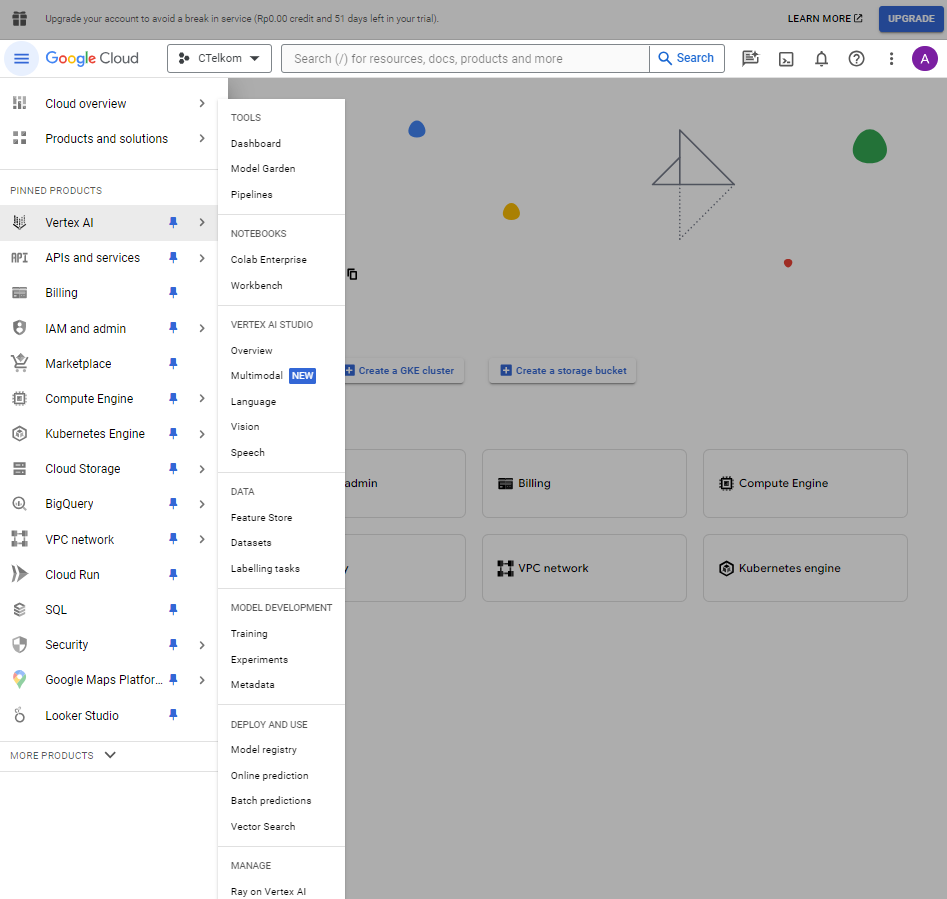

- Select **Datasets**
- Select **CREATE DATASET**

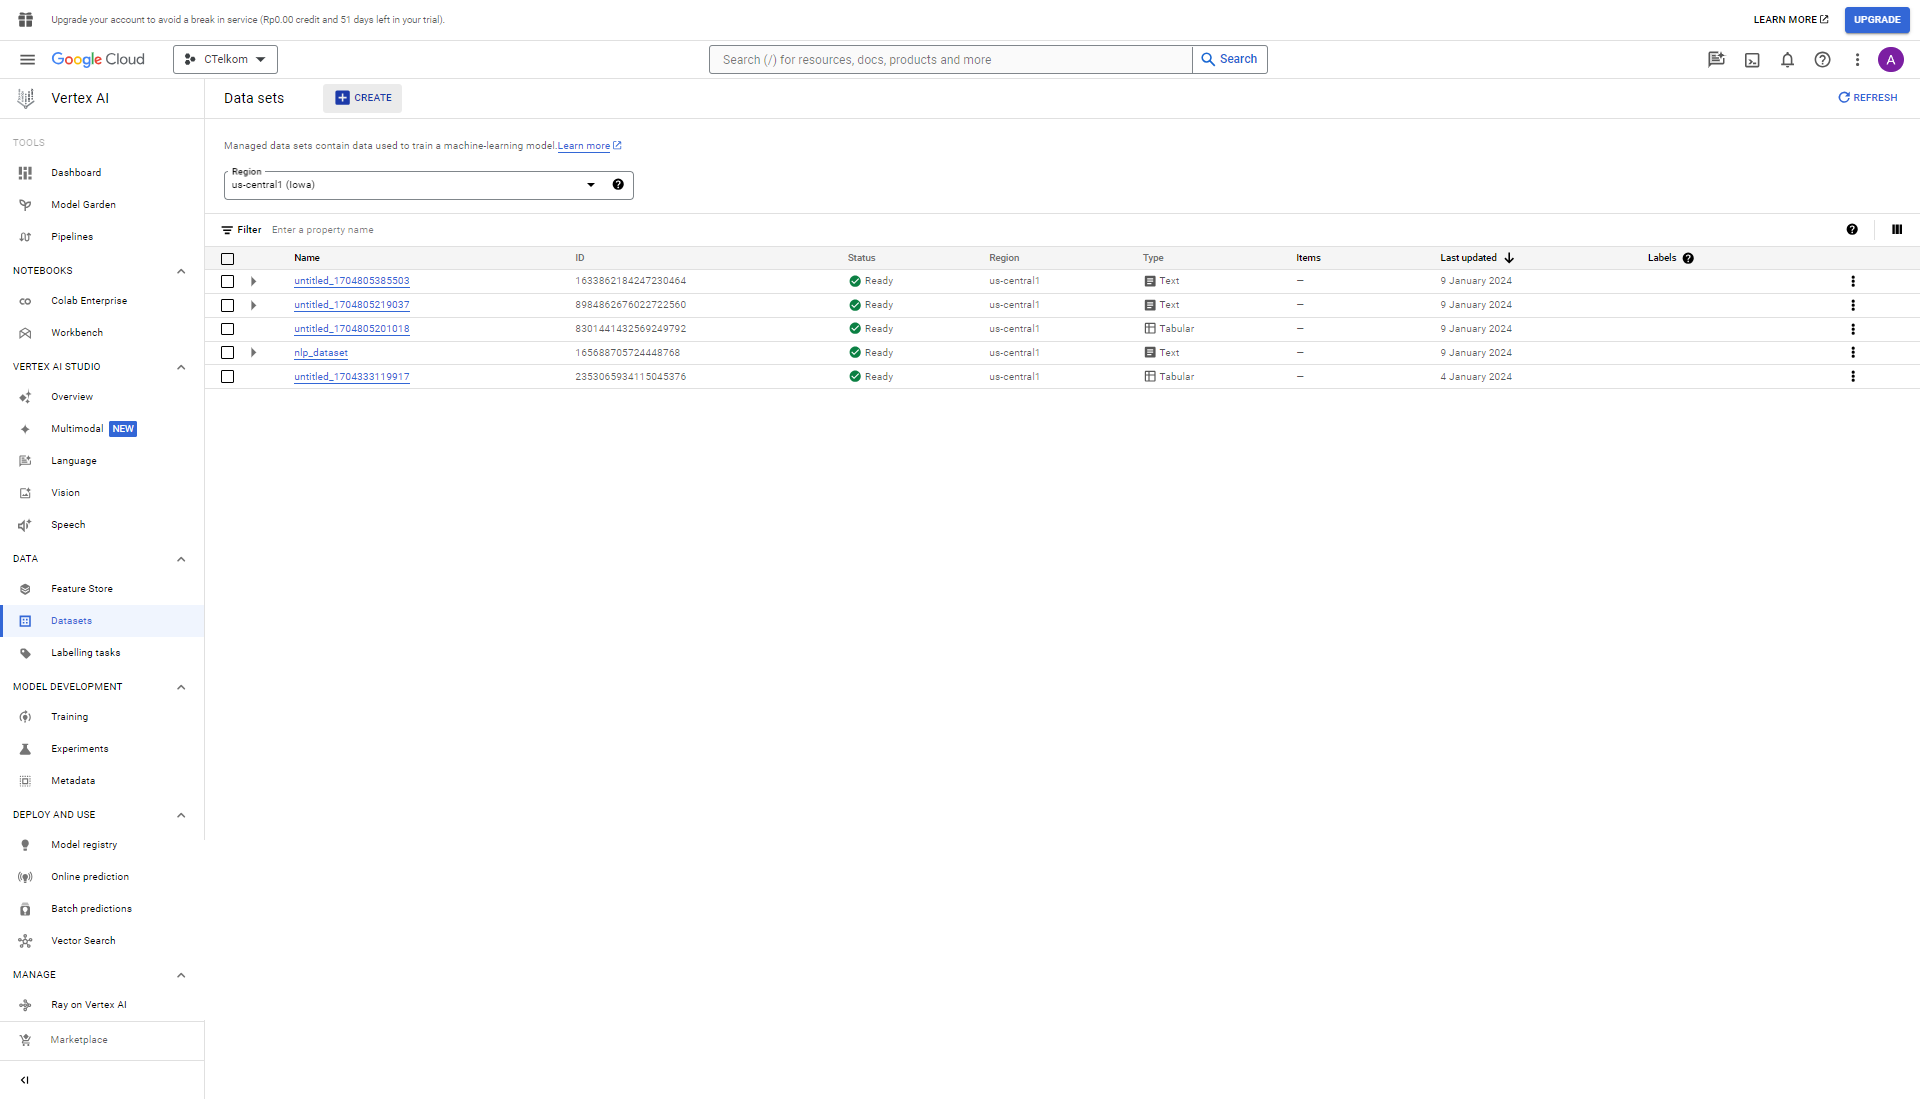

- Name the dataset
- Select **Tabular** and **Regression/classification**

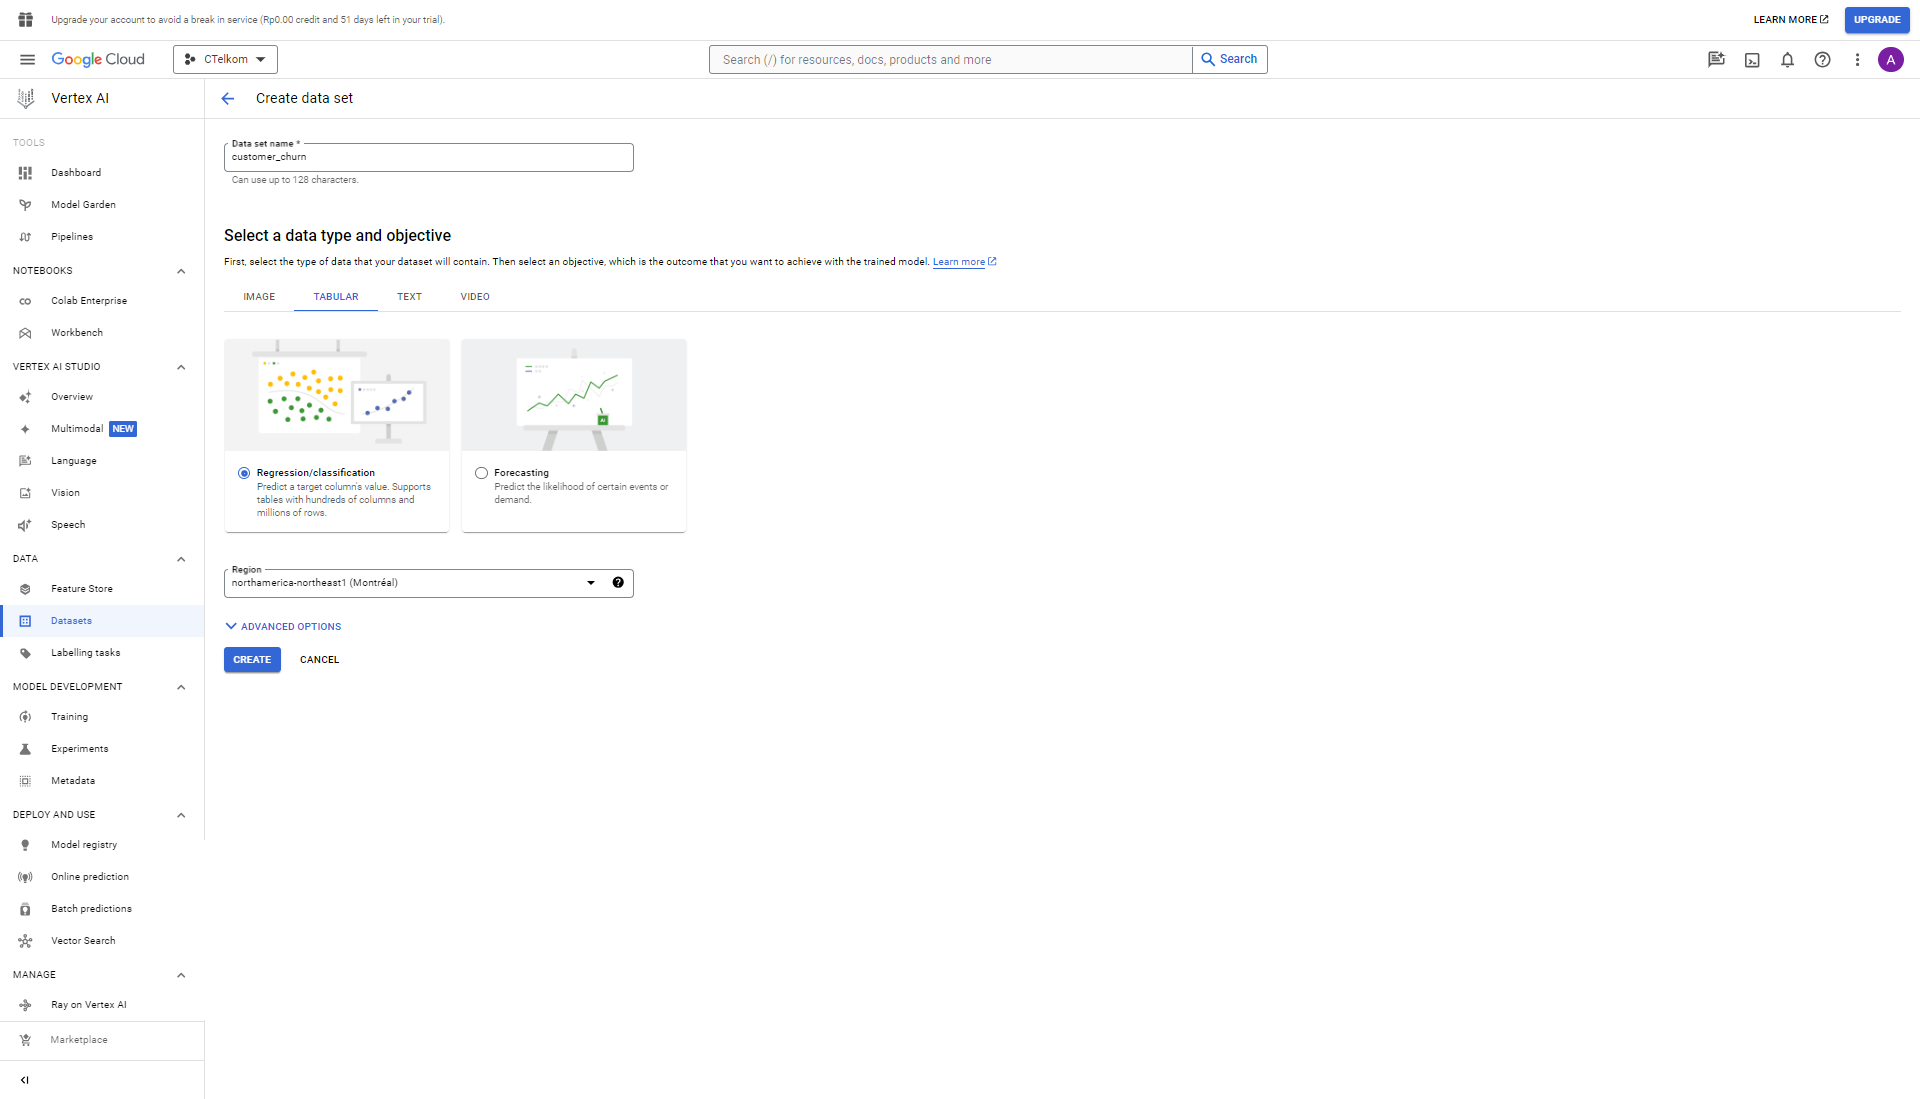

- Add data from Cloud Storage Bucket, **Select CSV files from Cloud Storage**

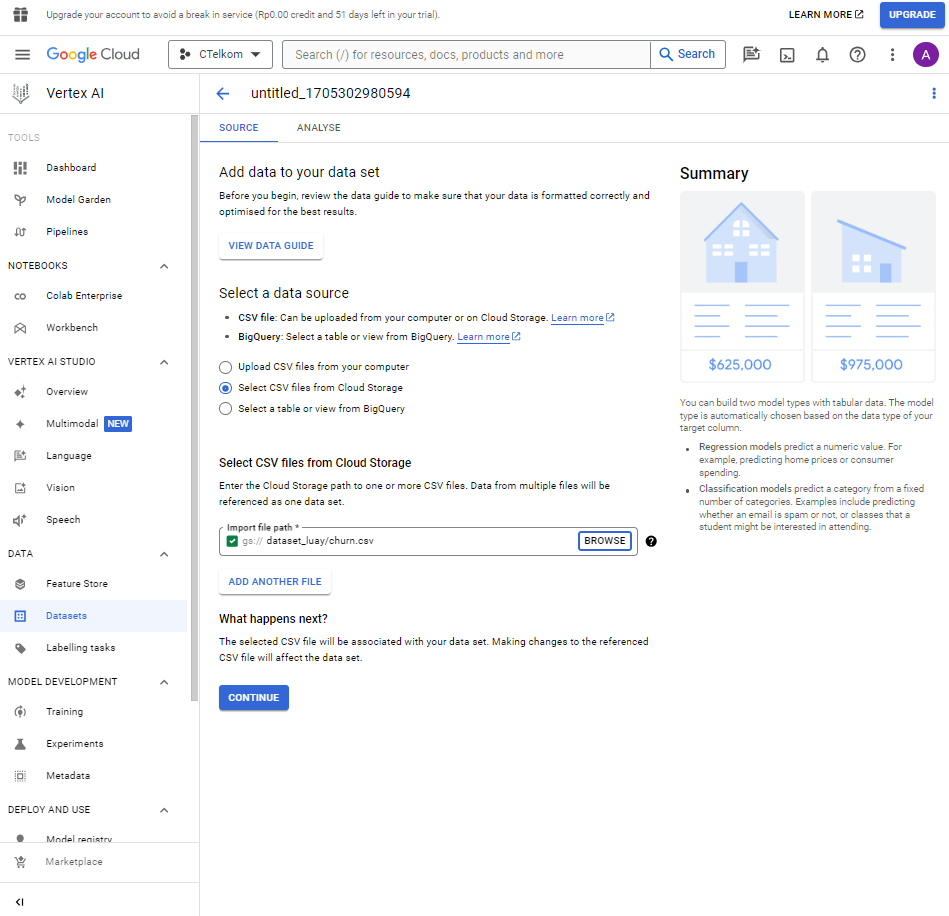

- The **ANALYZE** tab for the dataset will be displayed for review:
- Click **GENERATE STATISTICS** to view the statistics for each column

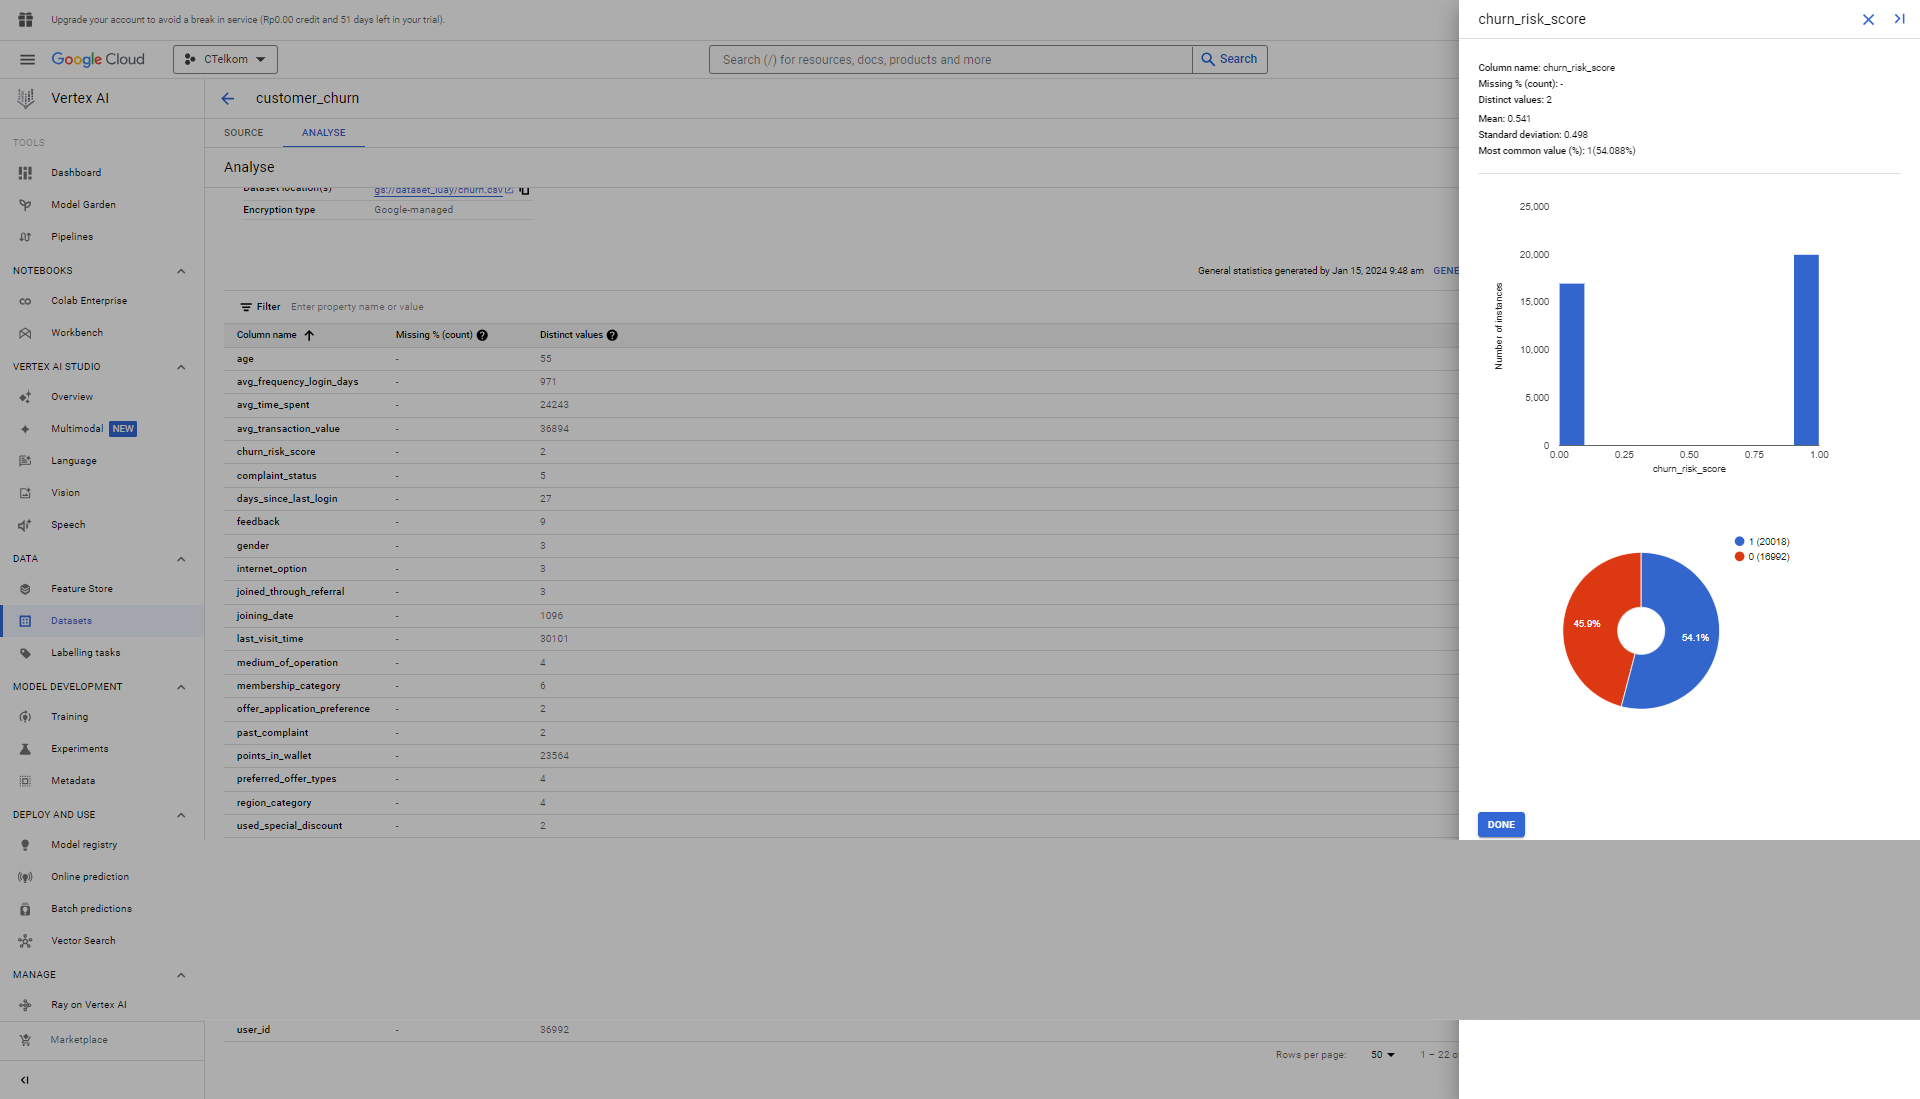



---



# Train Model with AutoML

On The Vertex AI console, select Training:
- For Objective make sure **Classification** is selected
- Use **AutoML** for the method
- Select **CONTINUE**

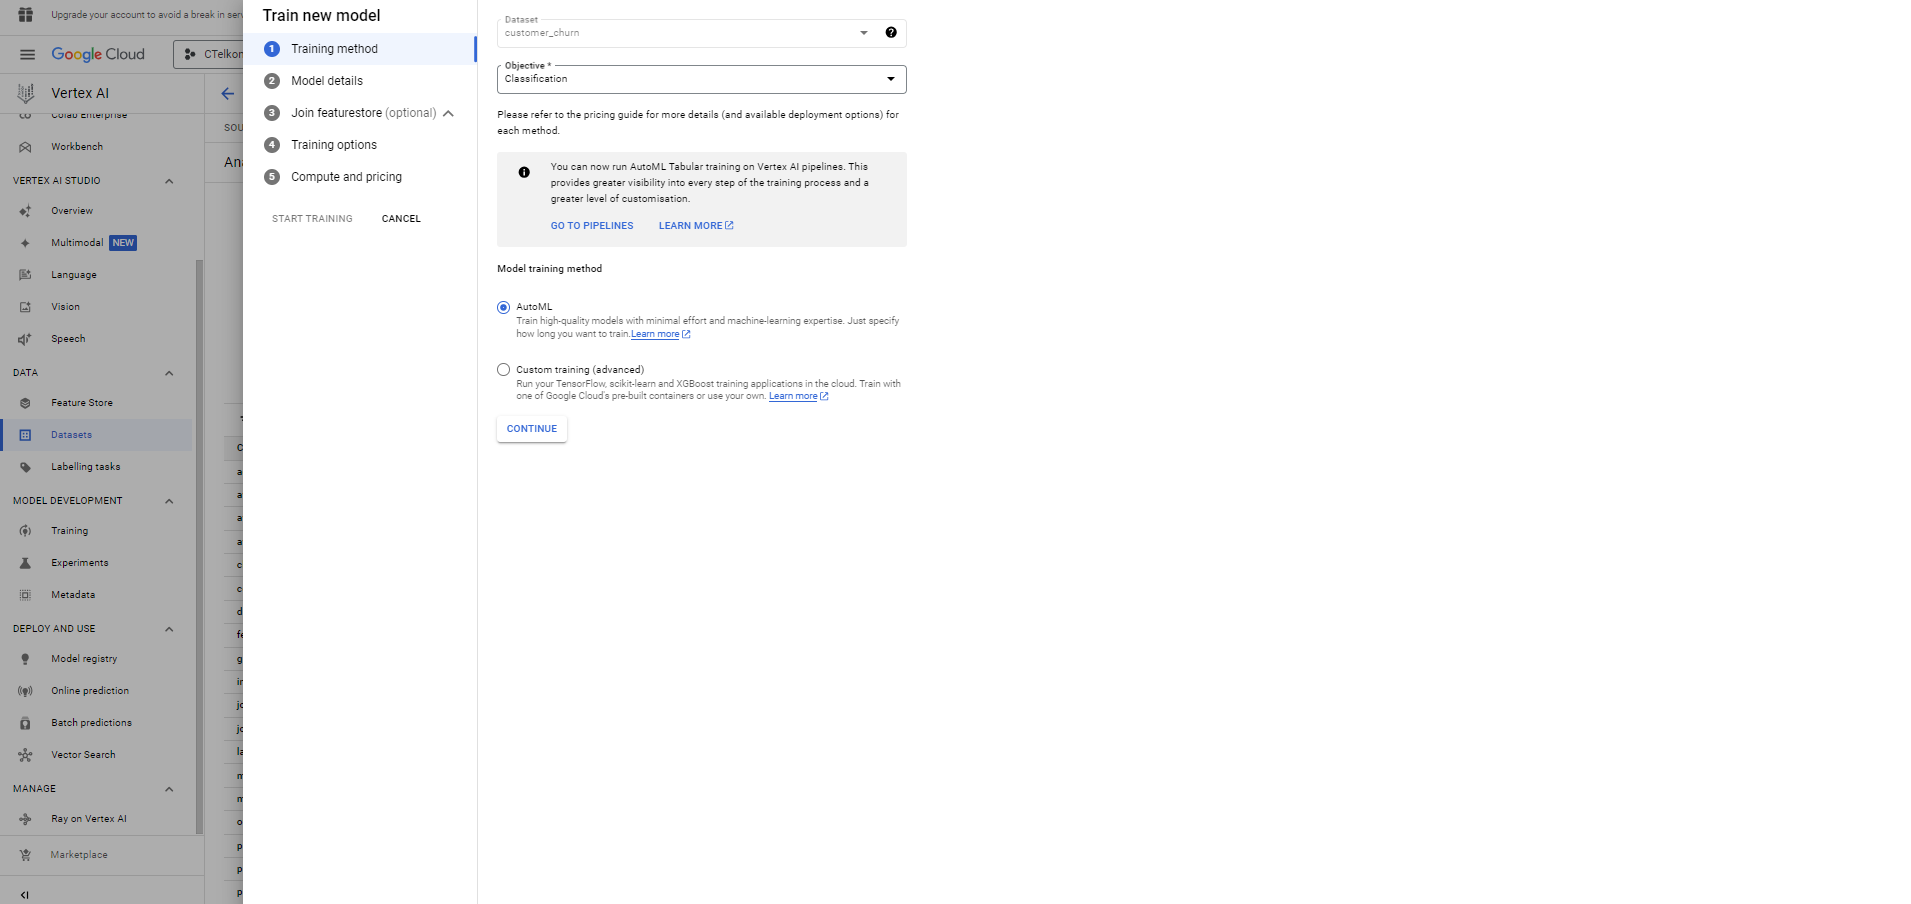

- Set the display **name** for your model
- Specify the **target** column for classification
- Select **CONTINUE**

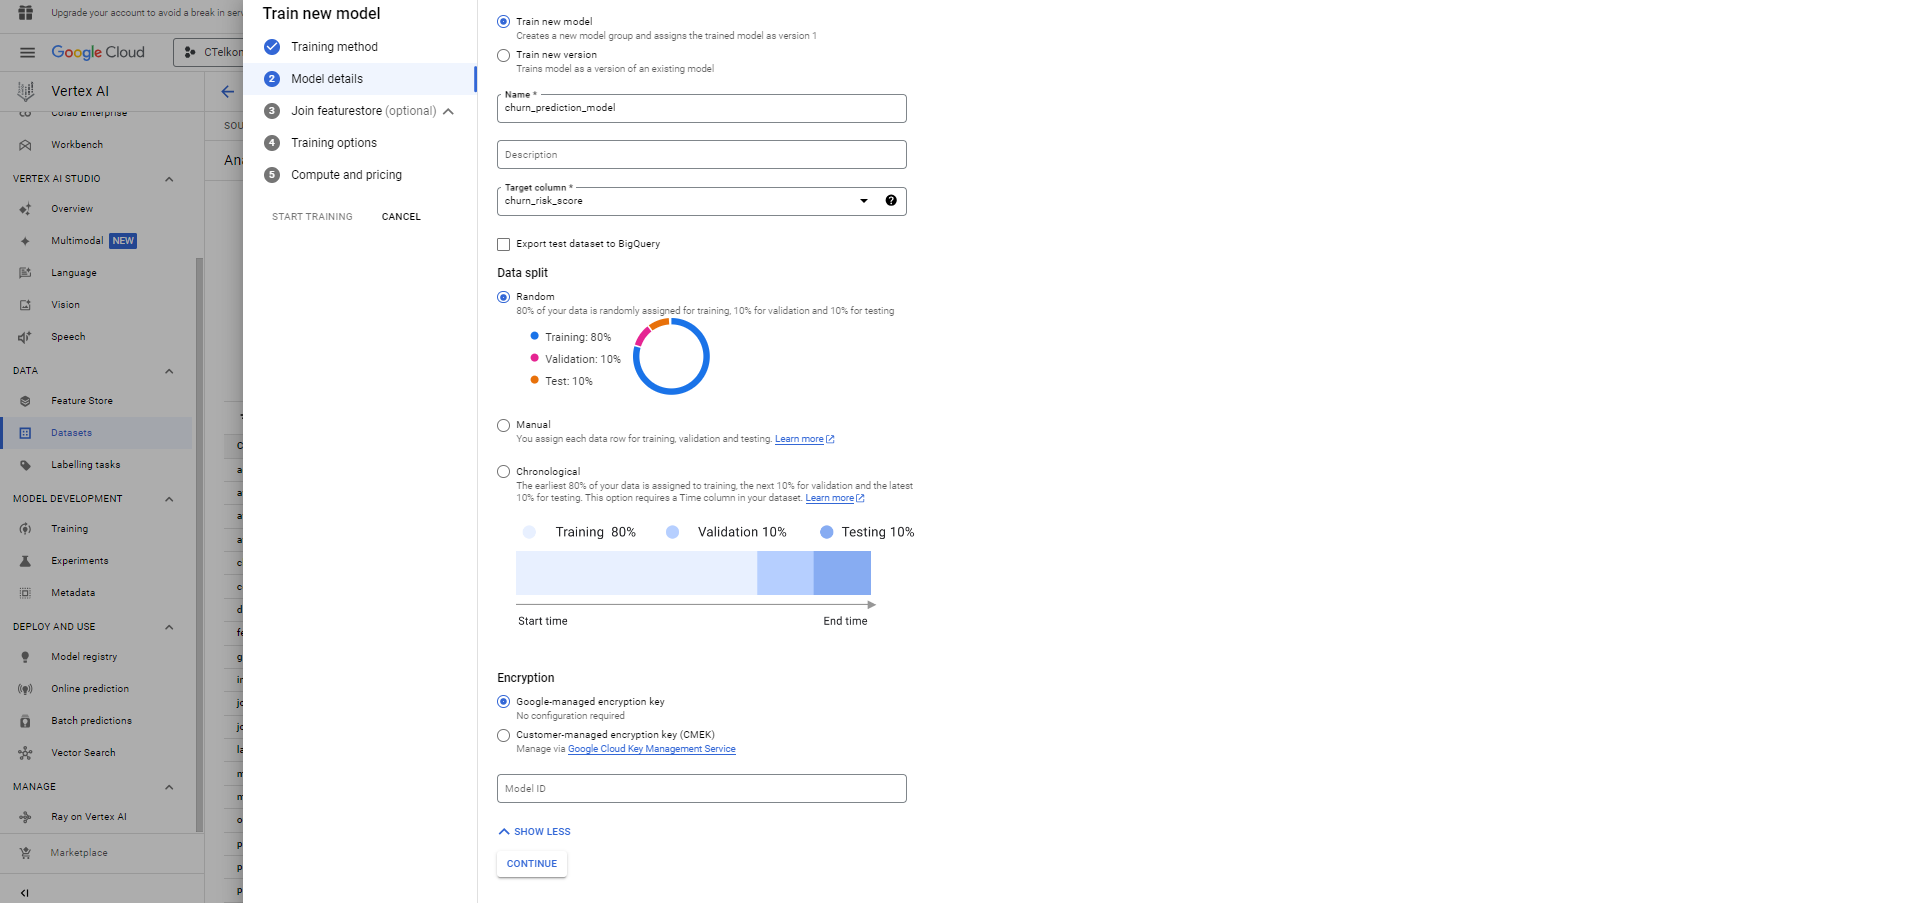

For Training options:
- Select **Show More on Advanced Options**
  - **Model Weight**
  - **Optimisation objectives**
- Select **CONTINUE**


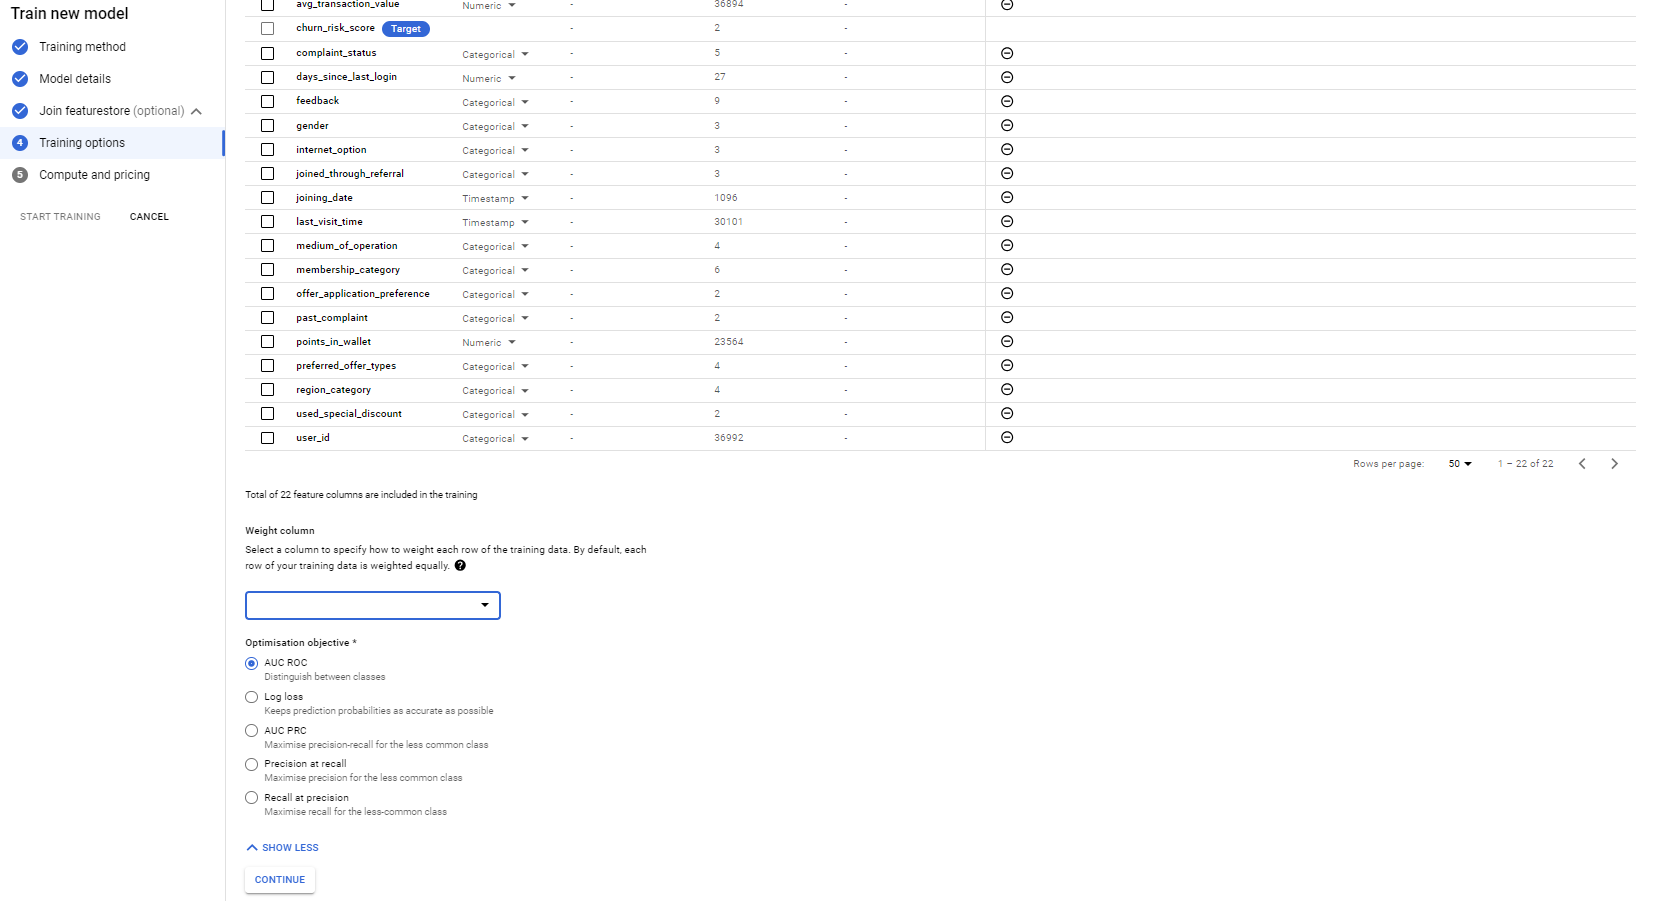

For Compute and Pricing:
- Enter a **Budget** of 1 node hour
- Make sure **Enable early stopping** is toggled on
- Select **START TRAINING**

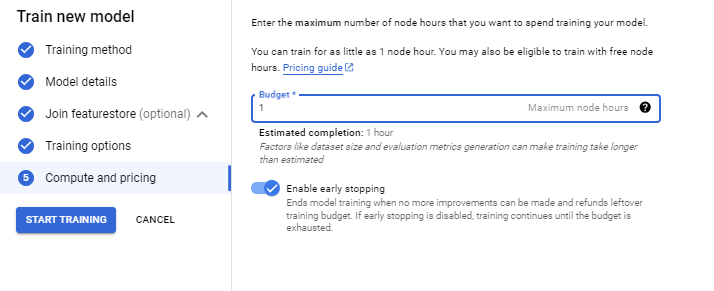



---



# Model: Evaluate, Select, Deploy

- Select the previously **trained model**
- This brings up the **EVALUATE** tab for the model
- In the **EVALUATE** tab, you can see the **Evaluation details** of the previously trained model.

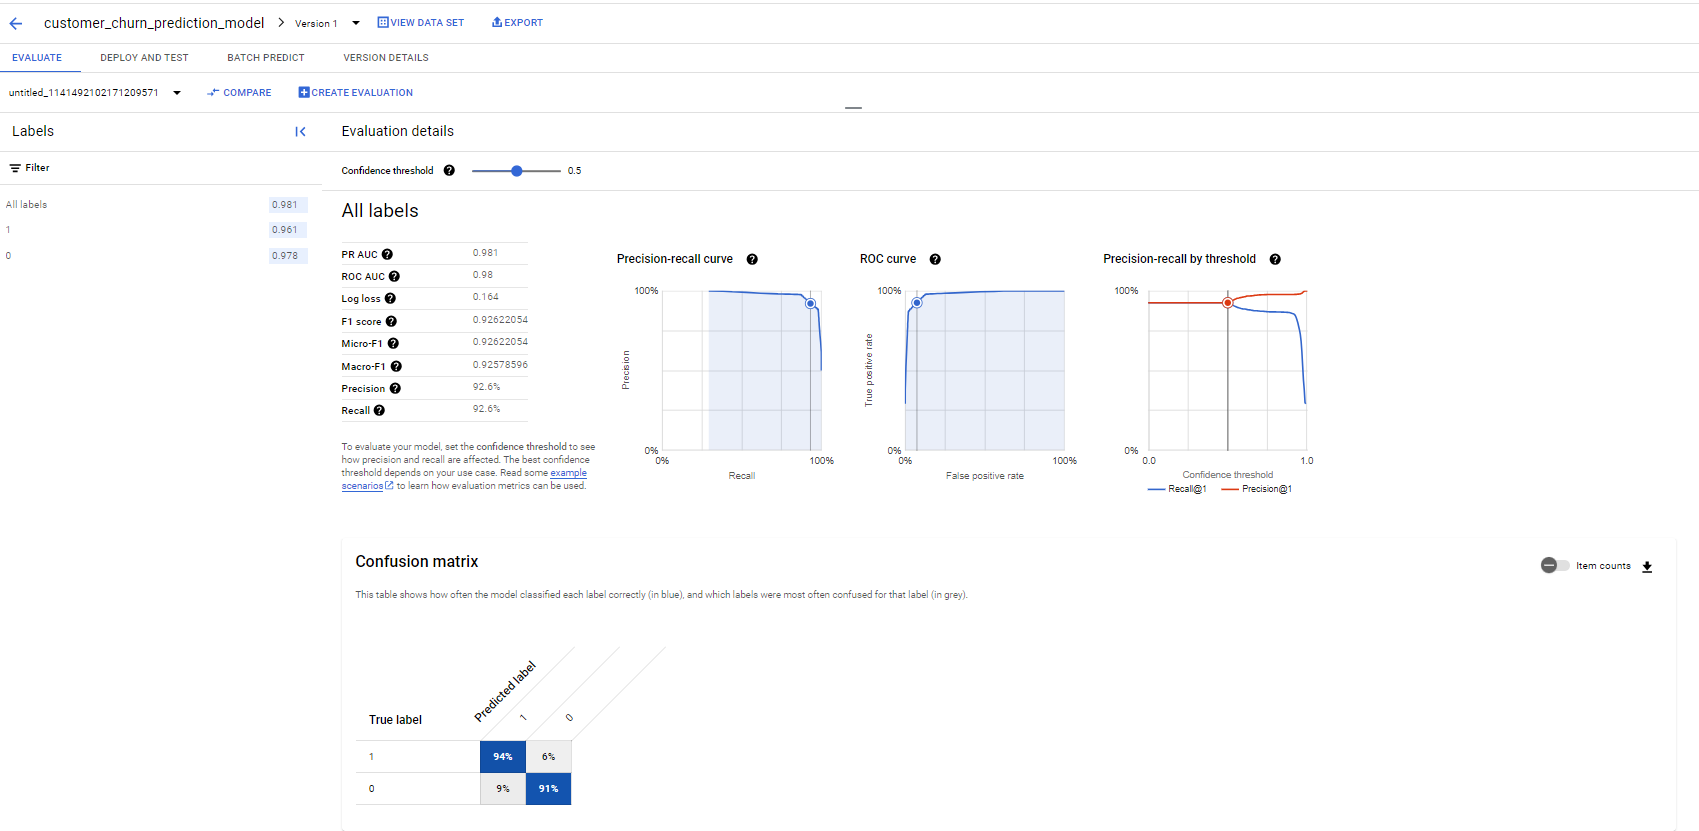

- Select the tab labeled **DEPLOY AND TEST**



---



# Endpoint

While still on the Vertex AI Models section with the **DEPLOY & TEST** tab selected:
- select **DEPLOY TO ENDPOINT**


In the Deploy to endpoint menus, complete Define your endpoint:
- Specify the **Endpoint name**
- keep defaults for location and Access
- Select **CONTINUE**

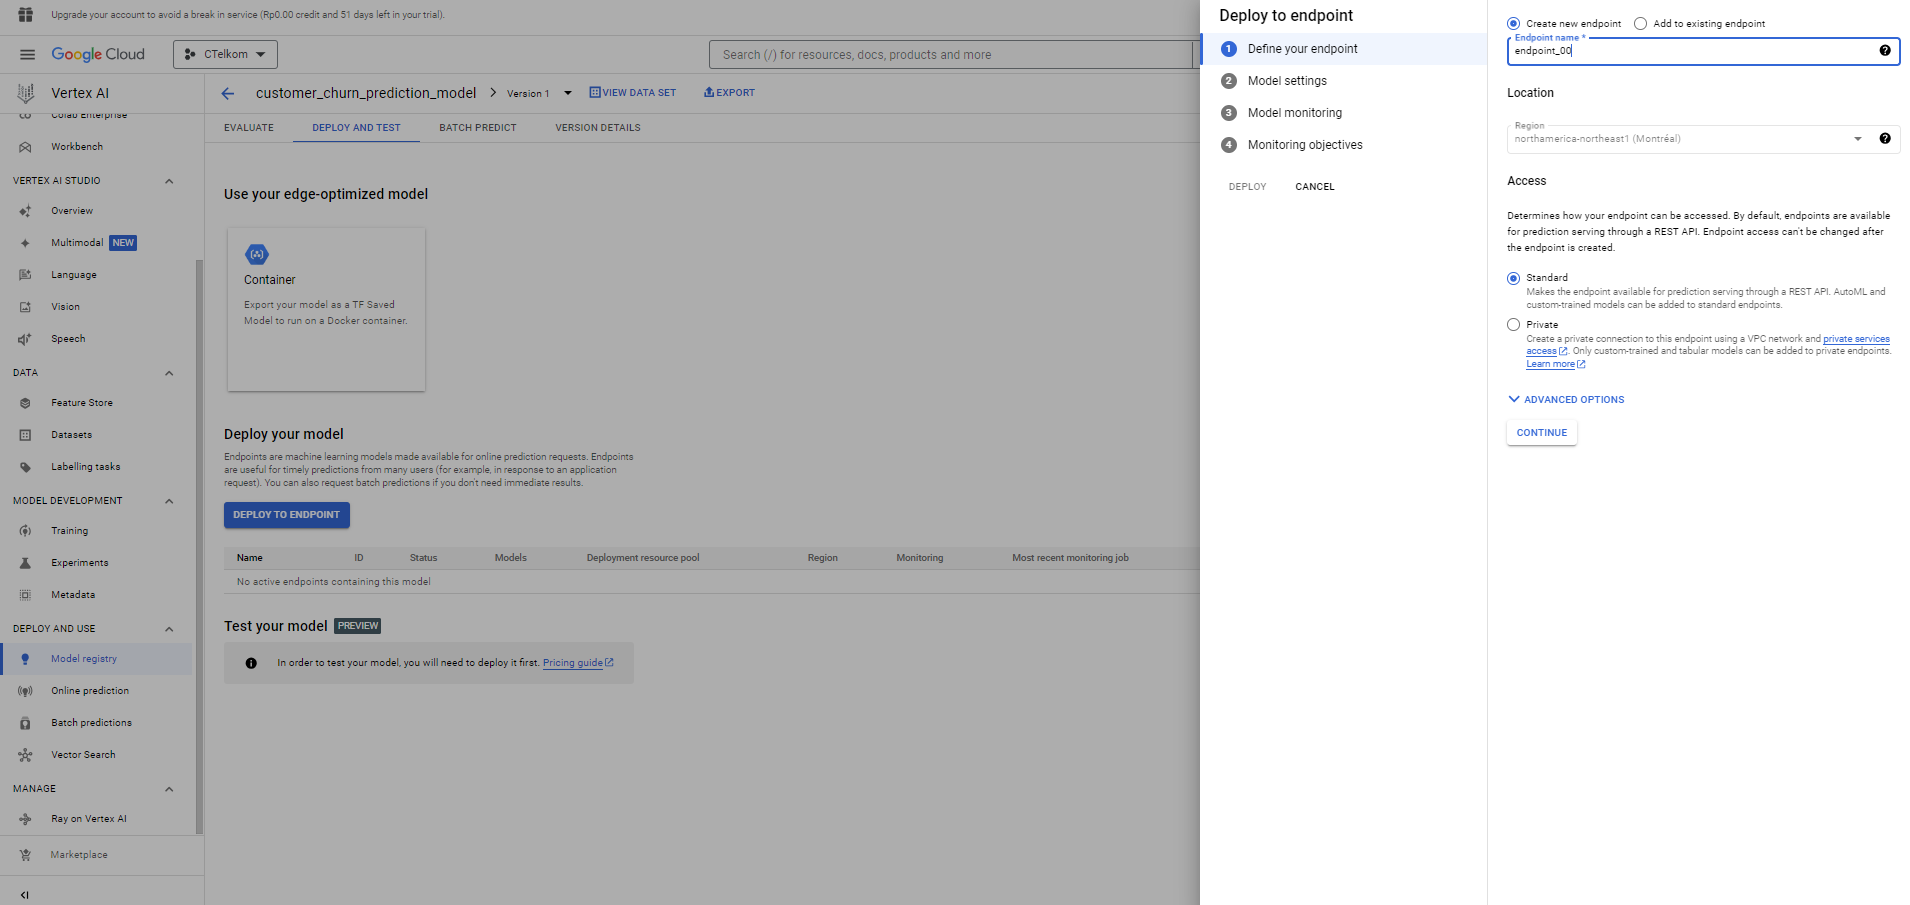

In the Model settings section:
- **Traffic split** should be 100
- minimum number of computes nodes is 1
- keep the remaining default values for max nodes, scaling, logging and explainability
- Select **CONTINUE**

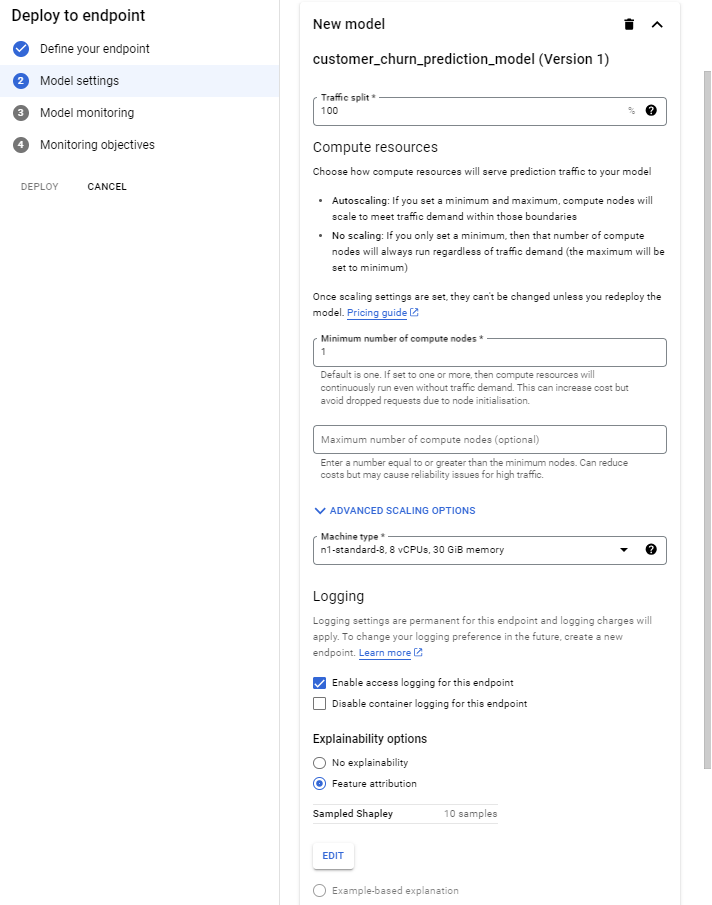

In the Model monitoring section:
- **Toggle Enable model monitoring for this endpoint off**
- Select **DEPLOY**

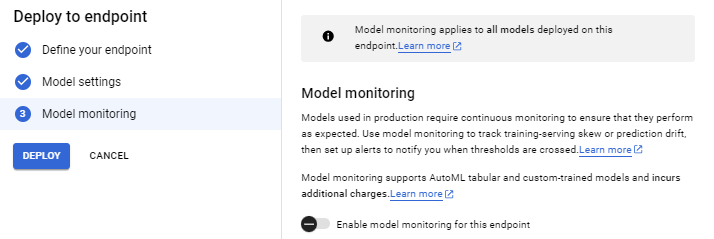



---




# Prediction

## Install Packages

Install the required packages

In [12]:
#!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2

## Import Library

In [13]:
# import library
from google.cloud import aiplatform
import pandas as pd
import os

## Create Service Account Key:

- Open the IAM & Admin page:
Navigate to the IAM & Admin section in the Google Cloud Console.

- Select your project:
In the top bar of the Google Cloud Console, make sure you have selected the correct project where you want to create the service account key.

- Navigate to Service Accounts:
In the left sidebar, click on "Service accounts."

- Create a new service account:
Click the "Create Service Account" button at the top of the page.

- Enter Service Account details:
Provide a name and description for your service account.
Optionally, set the role(s) that you want to grant to this service account. Roles determine the permissions the service account will have.

- Create and download the key:
After creating the service account, you will be prompted to create a key. Click on "Create Key."
Choose the key type (JSON is commonly used), and click "Create." This will download a JSON file containing your service account key.

- Store the key securely:
Keep the downloaded JSON key file in a secure location. This key file is used for authenticating your application or service with GCP.

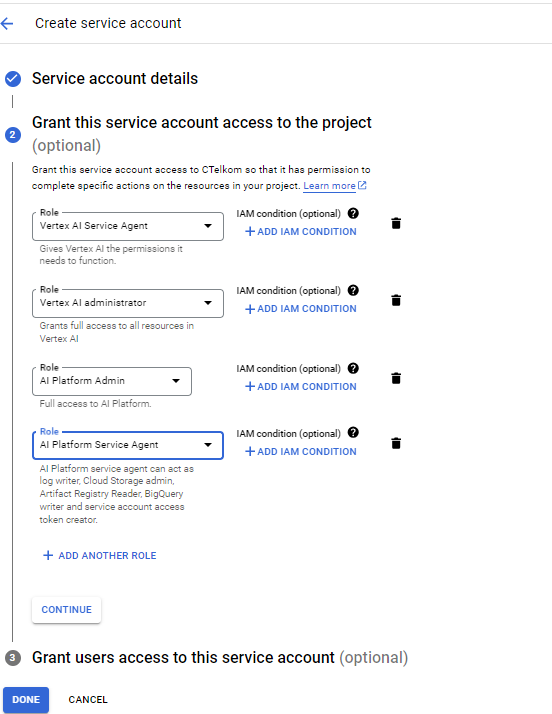

In [14]:
# Set the path to the JSON file
credentials_path = './backend/credentials.json'

# Set the GOOGLE_APPLICATION_CREDENTIALS environment variable
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_path

## Endpoint

- Model ID & Region

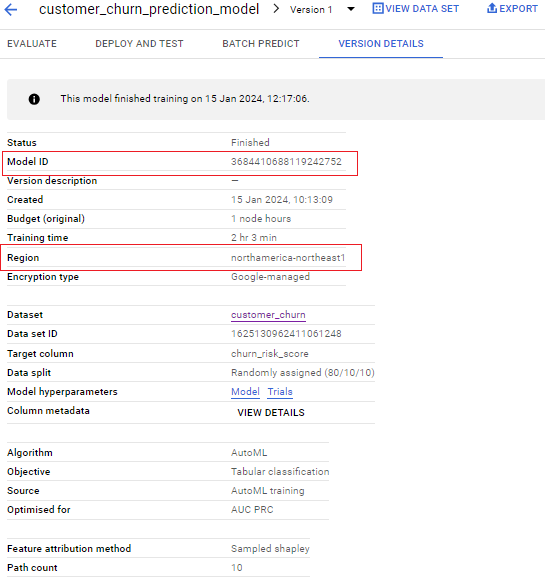

- Endpoint ID

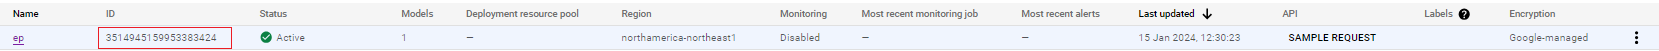

In [15]:
project_id = "ctelkom"
location = "northamerica-northeast1"
model_id = "4747541675155390464"
endpoint_id = "4392584137337208832"

In [16]:
# endpoint
endpoint = aiplatform.Endpoint(endpoint_name=endpoint_id
                               ,project=project_id,
                               location=location)

## Prediction

In [17]:
# Data loading
df = pd.read_csv('sample_10.csv')
df = df.astype(str)
df.head(10)


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,972706cb0db0068e,46,F,Town,Premium Membership,2015-03-27,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,16,1447.387929,11839.58,29,727.91,Yes,No,No,Not Applicable,No reason specified
1,82d62cc806fb2816,25,M,Town,Premium Membership,2016-09-07,nan,Without Offers,Smartphone,Wi-Fi,...,22,114.17,46885.8,8,793.11,No,Yes,Yes,Unsolved,No reason specified
2,a596b4679c30ef3e,64,M,nan,Basic Membership,2017-09-07,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,5,204.43,42224.69,26,510.37,Yes,No,Yes,Solved,Too many ads
3,8c4761dbf8df1816,52,F,City,Gold Membership,2017-12-31,Yes,nan,Smartphone,Wi-Fi,...,6,179.33,48836.04,20,705.0,Yes,No,Yes,Solved in Follow-up,No reason specified
4,8f2f492e0c25eb41,60,M,Town,Basic Membership,2015-07-08,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,15,38.94,14104.52,21,677.41,Yes,No,Yes,No Information Available,Poor Customer Service
5,9bba07c5c386c34c,57,F,City,Silver Membership,2016-06-22,No,Gift Vouchers/Coupons,nan,Mobile_Data,...,11,0.0,8150.9,20,793.32,No,Yes,No,Not Applicable,No reason specified
6,8a205a969e23299d,17,M,nan,Gold Membership,2015-05-19,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,11,199.94,75765.63,0,820.17,Yes,No,Yes,Solved,Quality Customer Care
7,91607fb18aafbfee,15,M,City,No Membership,2017-11-15,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,24,67.55,32777.77,23,533.44,Yes,No,No,Not Applicable,Poor Customer Service
8,847bddd58ff99d7e,32,M,Town,Basic Membership,2016-02-02,Yes,Without Offers,Smartphone,Mobile_Data,...,21,119.98,1888.81,28,628.93,No,Yes,No,Not Applicable,Too many ads
9,8c92ce118df969a1,29,M,Village,Platinum Membership,2016-10-19,No,Credit/Debit Card Offers,nan,Fiber_Optic,...,15,145.07,28873.91,19,715.5,No,Yes,No,Not Applicable,Too many ads


In [18]:
# Highlight rows with Churn == 1 in red
def highlight_red(row):
    if row['churn_prediction'] == 1:
        return ['background-color: red'] * len(row)
    else:
        return [''] * len(row)

In [19]:
# Prepare instances
instances = df.to_dict(orient='records')

In [20]:
# Send prediction request
response = endpoint.predict(instances=instances)

In [21]:
# Extract predictions
predictions = response.predictions

In [22]:
# Create a new DataFrame with predictions
predictions_df = pd.DataFrame(predictions)

In [23]:
# Extract the second element from 'scores' (indicating the probability of class 1)
prob_class_1 = [score[1] for score in predictions_df['scores']]
prob_class_0 = [score[0] for score in predictions_df['scores']]
predictions_df['churn_prediction'] = [1 if p1 < p0 else 0 for p1, p0 in zip(prob_class_1, prob_class_0)]

In [24]:
# Display or save the resulting DataFrame as needed
predictions_df = predictions_df.drop(["classes","scores"], axis='columns')
predictions_df['user_id'] = df['user_id']

In [25]:
# Reorder columns to have 'user_id' at the most left
predictions_df = predictions_df[['user_id', 'churn_prediction']]
predictions_df.style.apply(highlight_red, axis=1)

,user_id,churn_prediction
0,972706cb0db0068e,0
1,82d62cc806fb2816,0
2,a596b4679c30ef3e,1
3,8c4761dbf8df1816,0
4,8f2f492e0c25eb41,1
5,9bba07c5c386c34c,0
6,8a205a969e23299d,0
7,91607fb18aafbfee,1
8,847bddd58ff99d7e,1
9,8c92ce118df969a1,0
